<a href="https://colab.research.google.com/github/amshk01/Detection-of-Parkinson-s-Disease-USing-Machine-Learning/blob/main/parkinson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

               name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:P

<ipython-input-19-35b4edc0953a>:56: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col[index]], ax=ax[i][j])
<ipython-input-19-35b4edc0953a>:56: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col[index]], ax=ax[i][j])
<ipython-input-19-35b4edc0953a>:56: UserWarning: 

`distplot` is a depreca

   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   MDVP:APQ  Shimmer:DDA      NHR     HNR      RPDE       DFA   spread1  \

<Figure size 1000x600 with 0 Axes>

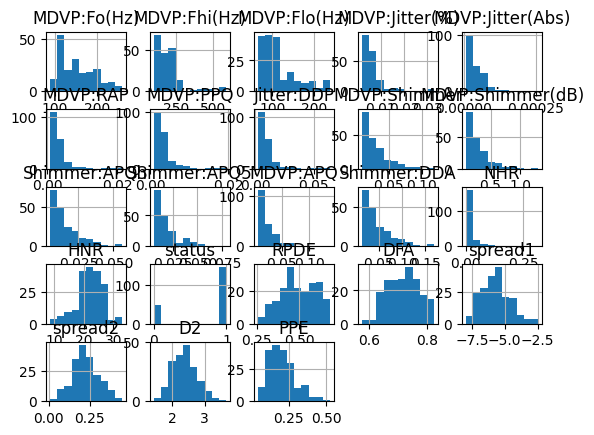

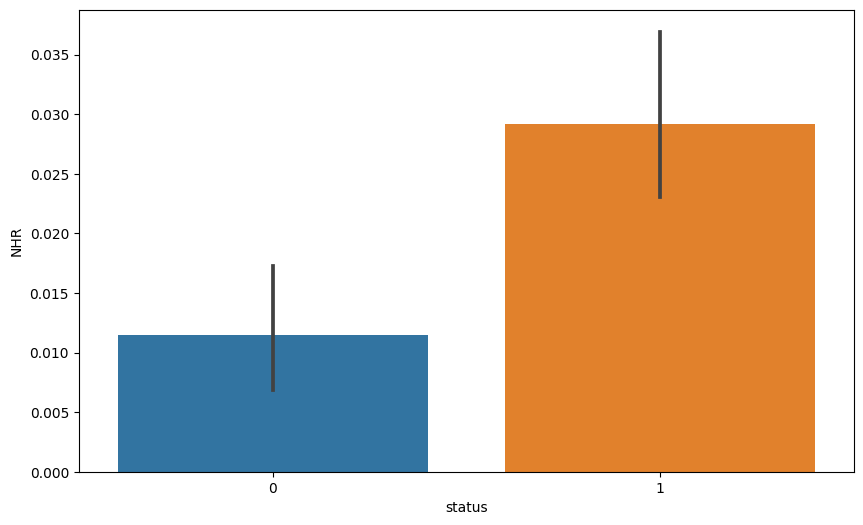

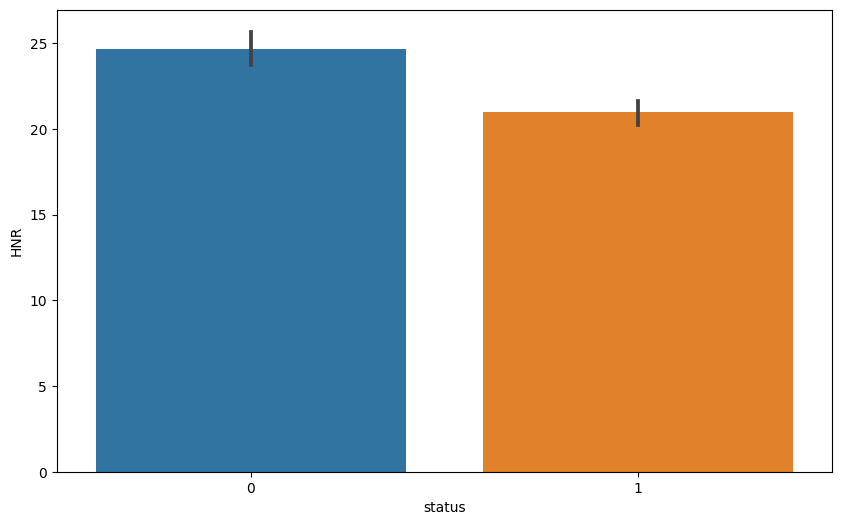

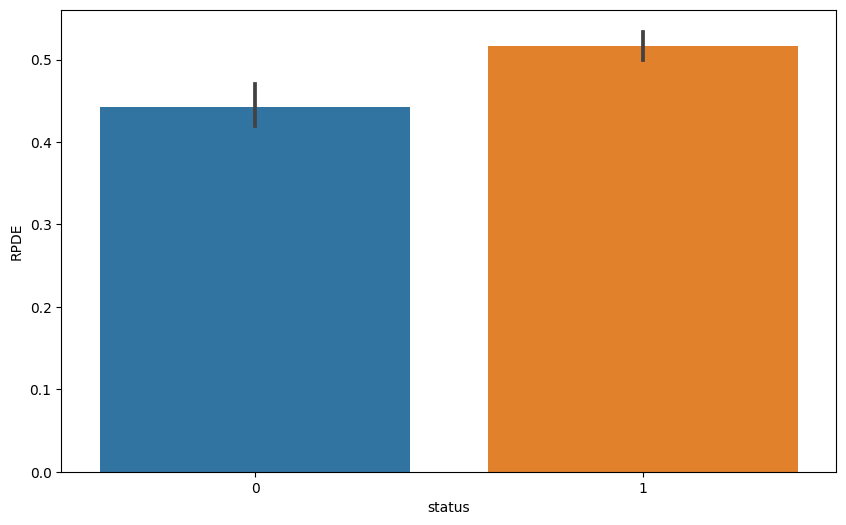

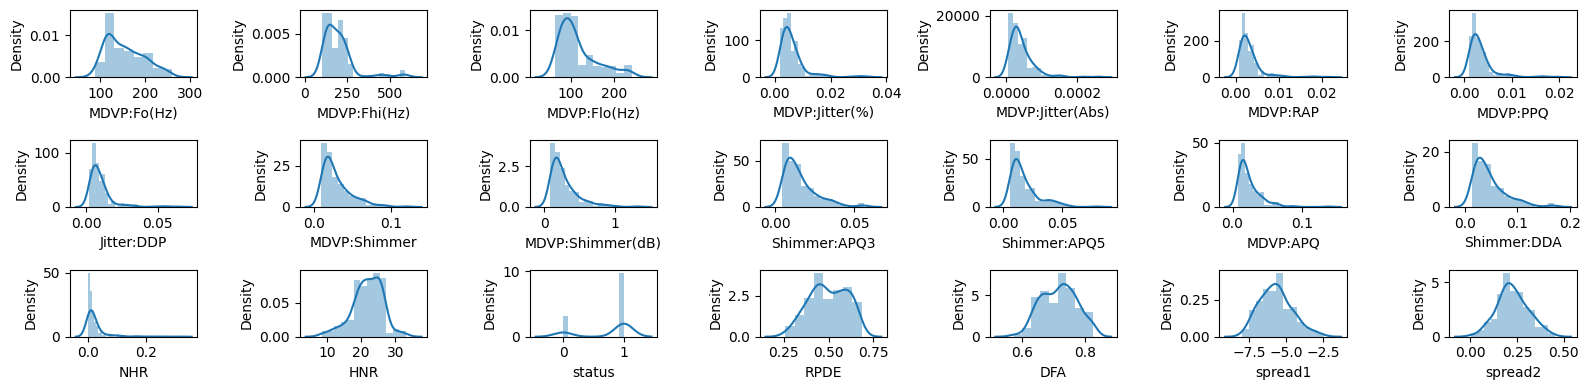

(156, 22) (39, 22) (156,) (39,)
Model accuracy on train for LR is:  0.8782051282051282
Model accuracy on test for LR is:  0.8717948717948718
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model accuracy on train for RFC is:  1.0
Model accuracy on test for RFC is:  0.9230769230769231
Model accuracy on train for DT is:  1.0
Model accuracy on test for DT is:  1.0
Model accuracy on train for NB is:  0.7307692307692307
Model accuracy on test for NB is:  0.6923076923076923
Model accuracy on train for KNN is:  0.9102564102564102
Model accuracy on test for KNN is:  0.8461538461538461
Model accuracy on train for SVM is:  0.8782051282051282
Model accuracy on test for SVM is:  0.8974358974358975


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv(r'/content/parkinsons.data')
# Read the CSV file with utf-8 encoding

# Display the DataFrame

print(df)

print(df.shape)
print(df.isnull().sum())
print(df.info())
print(df.describe())
print(df.columns)

plt.figure(figsize=(10, 6))

df.hist()
plt.xlabel('status')
plt.ylabel('Frequencies')
plt.plot()
# The dataset has high number of patients effected with Parkinson's disease.

plt.figure(figsize=(10, 6))
sns.barplot(x="status",y="NHR",data=df);
# The patients effected with Parkinson's disease have high NHR that is the measures of ratio of noise to tonal components in the voice.

plt.figure(figsize=(10, 6))
sns.barplot(x="status",y="HNR",data=df);
# The patients effected with Parkinson's disease have high HNR that is the measures of ratio of noise to tonal components in the voice.

plt.figure(figsize=(10, 6))
sns.barplot(x="status",y="RPDE",data=df);
# The nonlinear dynamical complexity measure RPDE is high in the patients effected with Parkinson's disease.

rows = 3
cols = 7
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 4))
col = df.columns
index = 1
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]], ax=ax[i][j])
        index = index + 1

plt.tight_layout()
# Distribution plot
# A distribution plot displays a distribution and range of a set of numeric values plotted against a dimension
df.drop(['name'],axis=1,inplace=True)
# Removing  name column for machine learning algorithms.
X=df.drop(labels=['status'],axis=1)
Y=df['status']
print(X.head())
print(Y.head())
### Spitting the dataset into x and y
plt.show()

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
# Splitting the data into x_train, y_train, x_test, y_test

#Machine learning
#Logistic Regression
log_reg = LogisticRegression().fit(X_train, Y_train)

#predict on train
train_preds = log_reg.predict(X_train)
#accuracy on train
print("Model accuracy on train for LR is: ", accuracy_score(Y_train, train_preds))

#predict on test
test_preds = log_reg.predict(X_test)
#accuracy on test
print("Model accuracy on test for LR is: ", accuracy_score(Y_test, test_preds))
print('-'*50)

# #Confusion matrix
# print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds))
# print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds))

#Random Forest
RF=RandomForestClassifier().fit(X_train,Y_train)
#predict on train
train_preds2 = RF.predict(X_train)
#accuracy on train
print("Model accuracy on train for RFC is: ", accuracy_score(Y_train, train_preds2))

#predict on test
test_preds2 = RF.predict(X_test)
#accuracy on test
print("Model accuracy on test for RFC is: ", accuracy_score(Y_test, test_preds2))

# #Confusion matrix
# print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds2))
# print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds2))

# # Wrong Predictions made.
# print((Y_test !=test_preds2).sum(),'/',((Y_test == test_preds2).sum()+(Y_test != test_preds2).sum()))
#
# # Kappa Score
# print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds2))
#
# ## Let us go ahead and compare the predicted and actual values
# print(test_preds2)
#
# print(test_preds2,Y_test)

# ## Saving the actual and predicted values to a dataframe
# ddf=pd.DataFrame(data=[test_preds2,Y_test])
# print(ddf.T)
# 0 means Predicted Value and 1 is True Value.
# # Random forest model gives us an accuracy of 94 percent compared to logistic regression which gave us 84 percent accuracy

#Decision Trees
#fit the model on train data
DT = DecisionTreeClassifier().fit(X,Y)

#predict on train
train_preds3 = DT.predict(X_train)
#accuracy on train
print("Model accuracy on train for DT is: ", accuracy_score(Y_train, train_preds3))

#predict on test
test_preds3 = DT.predict(X_test)
#accuracy on test
print("Model accuracy on test for DT is: ", accuracy_score(Y_test, test_preds3))
# #Confusion matrix
# print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds3))
# print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds3))
# print('Wrong predictions out of total')
# print('-'*50)
#
# # Wrong Predictions made.
# print((Y_test !=test_preds3).sum(),'/',((Y_test == test_preds3).sum()+(Y_test != test_preds3).sum()))
# print('-'*50)
#
# # Kappa Score
# print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds3))
#

#Naive Bayes Classifier
NB=GaussianNB()
NB.fit(X_train,Y_train)
#fit the model on train data
NB=GaussianNB()
NB.fit(X_train,Y_train)

#predict on train
train_preds4 = NB.predict(X_train)
#accuracy on train
print("Model accuracy on train for NB is: ", accuracy_score(Y_train, train_preds4))

#predict on test
test_preds4 = NB.predict(X_test)
#accuracy on test
print("Model accuracy on test for NB is: ", accuracy_score(Y_test, test_preds4))

# #Confusion matrix
# print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds4))
# print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds4))
# print('Wrong predictions out of total')
# print('-'*50)
#
# # Wrong Predictions made.
# print((Y_test !=test_preds4).sum(),'/',((Y_test == test_preds4).sum()+(Y_test != test_preds4).sum()))
# print('-'*50)
#
# # Kappa Score
# print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds4))

# K-NearestNeighbours

#fit the model on train data
KNN = KNeighborsClassifier().fit(X_train,Y_train)
#predict on train
train_preds5 = KNN.predict(X_train)
#accuracy on train
print("Model accuracy on train for KNN is: ", accuracy_score(Y_train, train_preds5))

#predict on test
test_preds5 = KNN.predict(X_test)
#accuracy on test
print("Model accuracy on test for KNN is: ", accuracy_score(Y_test, test_preds5))
# #Confusion matrix
# print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds5))
# print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds5))
# print('Wrong predictions out of total')
# print('-'*50)
#
# # Wrong Predictions made.
# print((Y_test !=test_preds5).sum(),'/',((Y_test == test_preds5).sum()+(Y_test != test_preds5).sum()))
#
# print('-'*50)
# # Kappa Score
# print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds5))

# SupportVectorMachine
#fit the model on train data
SVM = SVC(kernel='linear')
SVM.fit(X_train, Y_train)

#predict on train
train_preds6 = SVM.predict(X_train)
#accuracy on train
print("Model accuracy on train for SVM is: ", accuracy_score(Y_train, train_preds6))

#predict on test
test_preds6 = SVM.predict(X_test)
#accuracy on test
print("Model accuracy on test for SVM is: ", accuracy_score(Y_test, test_preds6))

# #Confusion matrix
# print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds6))
# print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds6))
# print('Wrong predictions out of total')
# print('-'*50)
#
# print("recall", metrics.recall_score(Y_test, test_preds6))
# print('-'*50)
#
# # Wrong Predictions made.
# print((Y_test !=test_preds6).sum(),'/',((Y_test == test_preds6).sum()+(Y_test != test_preds6).sum()))
# print('-'*50)
#
# # Kappa Score
# print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds6))